In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

### 2nd Requirement

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

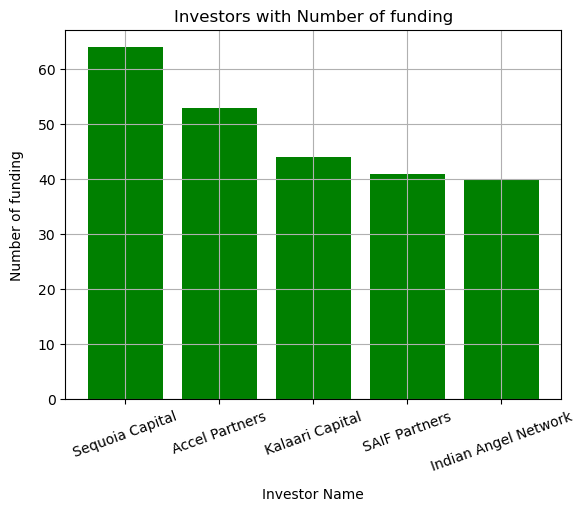

,investor_name,no_of_investments
0,Sequoia Capital,64
1,Accel Partners,53
2,Kalaari Capital,44
3,SAIF Partners,41
4,Indian Angel Network,40


In [8]:
#importing dataset
dataset = 'startup_funding.csv'
df = pd.read_csv(dataset,encoding='utf-8')

#Clearing any NaN values from InvestorsName column
df = df[df['InvestorsName'].notna()]

#filtering the investor name as per description
remove_value= ['Undisclosed Investors','Undisclosed investors','undisclosed investor', 'undisclosed investors']
df = df[df['InvestorsName'].isin(remove_value) == False]

#seaprating out multiple investor name for a single startup
def separate(s):
    return s.strip().split(',')

df['InvestorsName'] = df['InvestorsName'].apply(separate)

#creating a list which has all the investors name including repetition
n = np.array(df['InvestorsName'])
flat_list = [item.strip() for sublist in n for item in sublist]

#converting list to dataframe and removing empty vlaues if any
df1 = pd.Series(flat_list)
df1 = df1[df1 != '']

#finding the frequency of each investor name in dataframe
res = df1.value_counts()

#storing the top 5 investor name with their counts (basically count is the no. of funding they have made)
investor_name = res.index[:5]
no_of_investments = res.values[:5]

#plotting a graph
plt.bar(investor_name,no_of_investments,color='green')
plt.xlabel('Investor Name',labelpad=10)
plt.xticks(rotation=20)
plt.ylabel('Number of funding',labelpad=10)
plt.title("Investors with Number of funding")
plt.grid()
plt.show()

#FINAL DATA
result_data = list(zip(investor_name, no_of_investments))
final_df = pd.DataFrame(result_data, columns=['investor_name','no_of_investments'])
final_df